# Importing Data And Libraries

In [2]:
# Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook
%matplotlib inline

In [9]:
#Imported path
Path = r'C:\Users\Raghu\Desktop\6.3 excerise\original data\Adidas US Sales Datasets.xlsx'

In [10]:
#Imported Adidas US Sales Dataset.
df = pd.read_excel(os.path.join(path, 'original data', 'Adidas US Sales Datasets.xlsx'), index_col=False)


In [11]:
#Checked head
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [12]:
#Checked shape
df.shape

(9648, 13)

In [14]:
#Deleted unnecessary columns
df = df.drop(columns=['Invoice Date'])

In [15]:
df.columns

Index(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product',
       'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit',
       'Operating Margin', 'Sales Method'],
      dtype='object')

In [16]:
#Rechecked shape,
df.shape

(9648, 12)

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

In [18]:
#Checked for missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

# Checking For Extreme Values

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


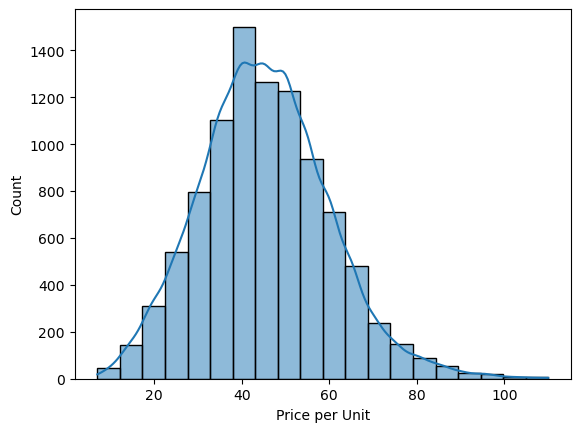

In [19]:
#Created a histogram for extreme values for Price per Unit
hist_price = sns.histplot(df['Price per Unit'], bins = 20, kde = True)

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


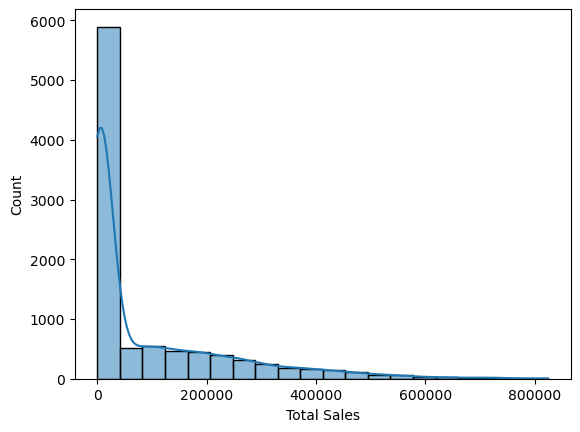

In [20]:
#Created a histogram for extreme values for Total Sales
hist_tot_sales = sns.histplot(df['Total Sales'], bins = 20, kde = True)

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


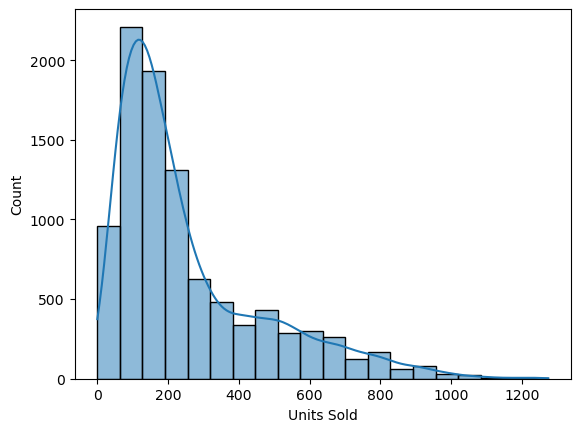

In [21]:
#Created a histogram for extreme values for Units Sold
hist_units_sold = sns.histplot(df['Units Sold'], bins = 20, kde = True)

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


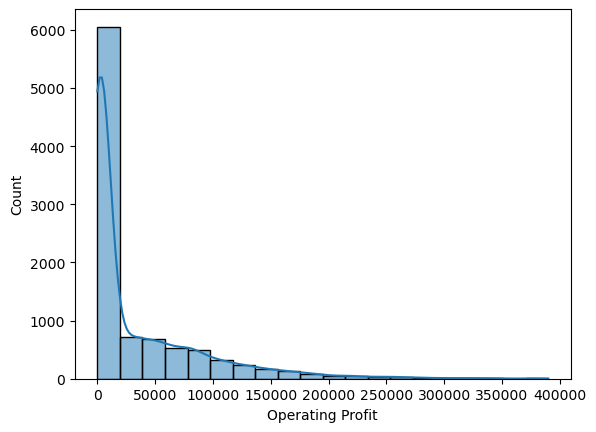

In [22]:
#Created a histogram for extreme values for Operating Profit
hist_op_profit = sns.histplot(df['Operating Profit'], bins = 20, kde = True)

# Exploring Relationships

C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


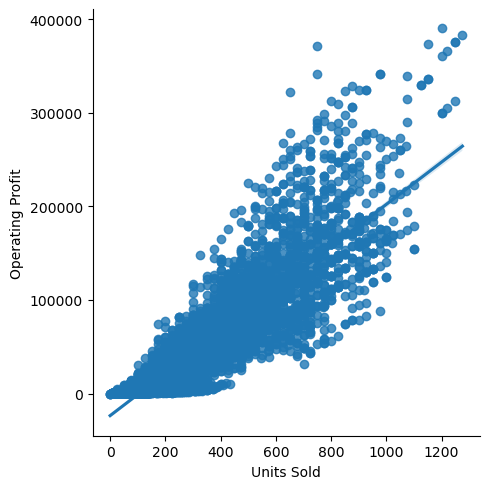

In [24]:
# Created scatterplot for units sold and operating profit
scatter_us_op = sns.lmplot(data=df, x='Units Sold', y='Operating Profit')


C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


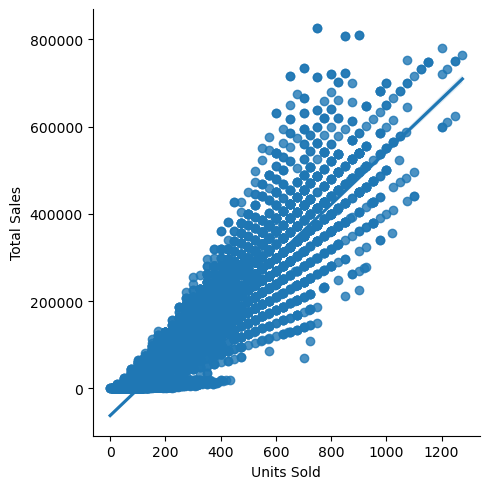

In [26]:
# Created scatterplot for units sold and total sales
scatter_us_ts = sns.lmplot(data=df, x='Units Sold', y='Total Sales')


C:\Users\Raghu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


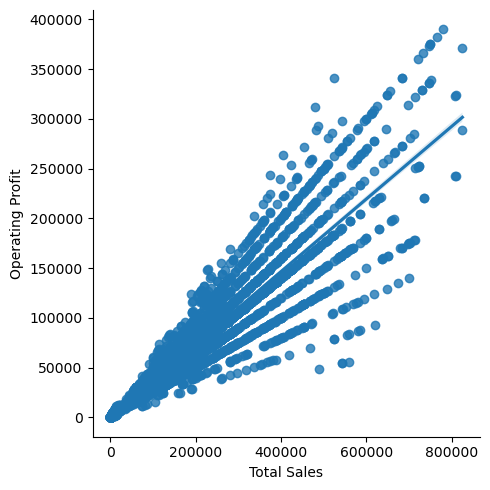

In [28]:
# Created scatterplot for total sales operating profit
scatter_ts_op = sns.lmplot(data=df, x='Total Sales', y='Operating Profit')


# Hypotheses

* As more units sell, the total sales and operating profit increases.

# Reshaping The Variables into NumPy arrays

# Testing Units Sold and Total Sales

In [29]:
# Reshaped the variables into NumPy arrays and put them into separate objects.
X = df['Units Sold'].values.reshape(-1,1)
y = df['Total Sales'].values.reshape(-1,1)

In [30]:
"X"

'X'

In [31]:
"Y"

'Y'

In [33]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [34]:
# Created a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicted the values of y using X.
y_predicted = regression.predict(X_test)

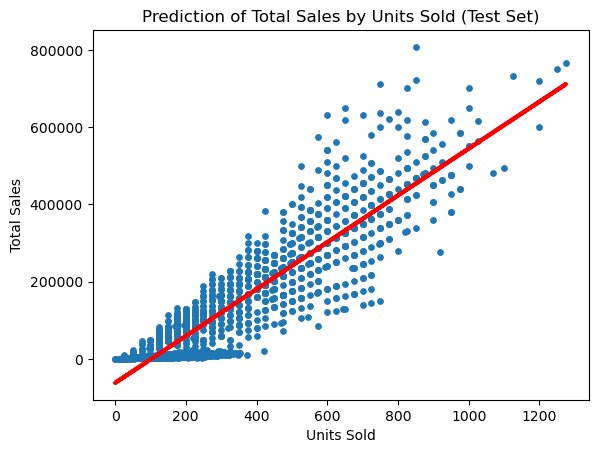

In [37]:
# Created a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Total Sales by Units Sold (Test Set)')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Total Sales')
plot_test.show()

In [38]:
# Created objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 


In [39]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[606.78304941]]
Mean squared error:  3161218558.189123
R2 score:  0.8367691510723754


In [40]:
# Created a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4352.0,15297.215799
1,7956.0,32287.141183
2,3900.0,-15041.936671
3,437.0,-48415.004388
4,5434.0,24398.961541
5,7820.0,77189.086839
6,2331.0,-24143.682412
7,12987.0,139687.740928
8,3780.0,52310.981813
9,148750.0,195511.781473


In [41]:
# Predicted
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[606.78304941]]
Mean squared error:  3410835259.9730506
R2 score:  0.8333493349661828


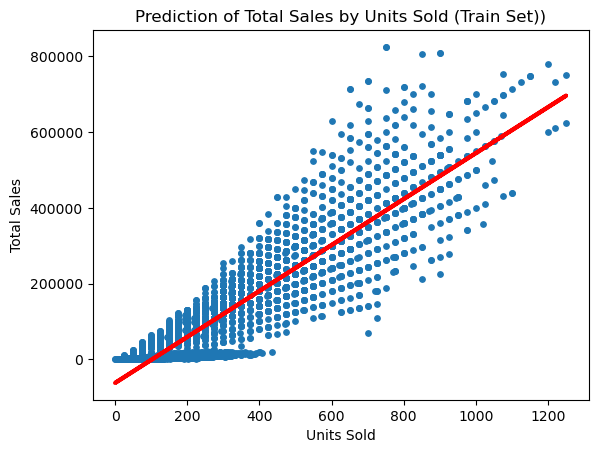

In [44]:
# Visualized the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Total Sales by Units Sold (Train Set))')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Total Sales')
plot_test.show()

### Conclusions
  Based on this information it can be seen that the Test Set and the Training Set both had the same slope indicating a positive relationship between units sold and total sales. However, the mean squared error is quite large and in the Training Set it was slighty higher at 3,410,835,259.97 compared to the Test Set at 3,161,218,558.19 it would be better if this was lower. The R2 value in both the Training Set and the Test Set were each at around 83% of the variance in total sales showing that a significant amount of this variance is explained by the number of units sold. Overall, the regression model did not perform that well seen with the actual and predicted values were significantly off and the MSE was very high.

# Testing Units Sold and Operating Profit

In [45]:
# Reshaped the variables into NumPy arrays and put them into separate objects.
X = df['Units Sold'].values.reshape(-1,1)
y = df['Operating Profit'].values.reshape(-1,1)

In [46]:
 "X"

'X'

In [47]:
"y"

'y'

In [48]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [49]:
# Created a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [50]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predicted the values of y using X.
y_predicted = regression.predict(X_test)

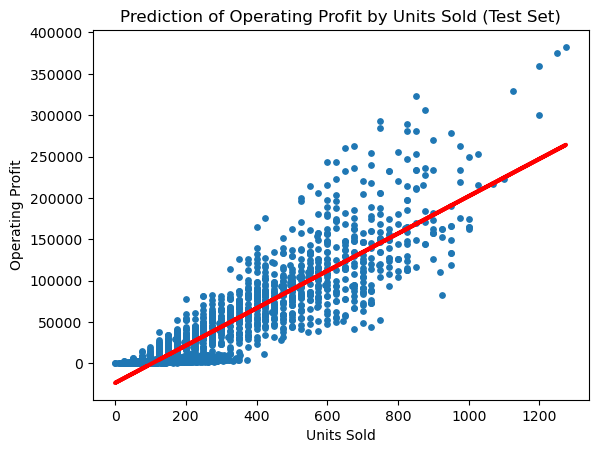

In [52]:
# Created a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of Operating Profit by Units Sold (Test Set)')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Operating Profit')
plot_test.show()

In [53]:
# Created objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [54]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[225.67351917]]
Mean squared error:  555610216.5154834
R2 score:  0.8047448950446685


In [55]:
# Created a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2698.24,5316.115465
1,4057.56,11634.974002
2,1248.00,-5967.560493
3,227.24,-18379.604047
4,2553.98,8701.218253
5,3049.80,28334.814420
6,1072.26,-9352.663281
7,3506.49,51579.186894
8,1512.00,19082.200134
9,52062.50,72341.150657


In [56]:
# Predicted
y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [57]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [58]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[225.67351917]]
Mean squared error:  616262755.0754054
R2 score:  0.7928889848705555


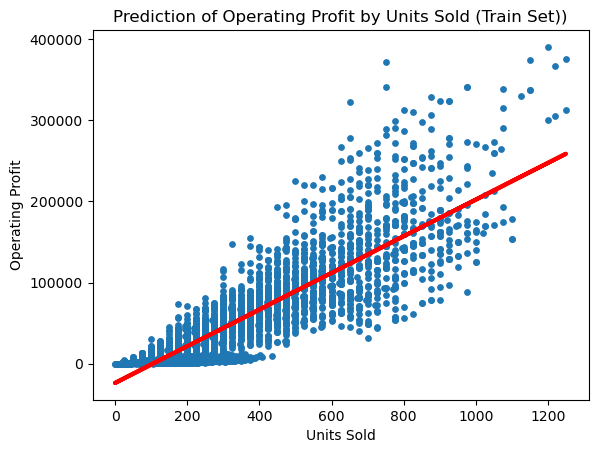

In [59]:
# Visualized the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Operating Profit by Units Sold (Train Set))')
plot_test.xlabel('Units Sold')
plot_test.ylabel('Operating Profit')
plot_test.show()


### Conclusions
Based on this information it can be seen that the Test Set and the Training Set results for Units Sold and Operating Profit are similar to the results from Units Sold and Totals Sales. Here both had the same slope indicating a positive relationship between units sold and operating profit. However, the mean squared error is quite large and in the Training Set it was slighty higher at 616262780.5056586 compared to the Test Set at 555610102.1060218 it would be better if this was lower. The R2 value in both the Training Set and the Test Set were approximately 80% of the variance in operating profit showing that a significant amount of this variance is explained by the number of units sold. Overall, the regression model did not perform that well seen with the actual and predicted values were significantly off and the MSE was very high.